# Heart Disease Prediction
This project predicts heart disease using patient health data and machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
df = pd.read_csv('data/heart_sample.csv')
print(df.head())

   age  cholesterol  blood_pressure  max_heart_rate  target
0   42          212             132             140       0
1   47          240             123             177       1
2   69          229              97             123       0
3   37          192             178             167       0
4   39          224             137             166       0


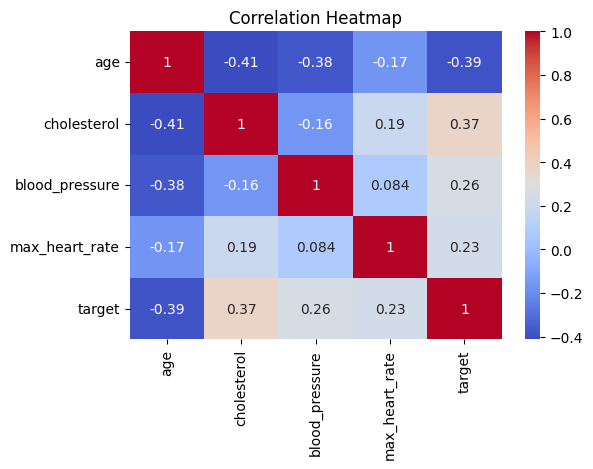

In [3]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [4]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression:\n', classification_report(y_test, y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



In [6]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest ROC-AUC:', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Random Forest ROC-AUC: 0.6666666666666667
